# Load the Generated Data

In this section, we will load the generated IoT sensor data from the `data/synthetic_sensors.csv` file using pandas. This will allow us to inspect and analyze the data further.

In [10]:
import pandas as pd

# Load the data
data_path = '../data/synthetic_sensors.csv'
data_original = pd.read_csv(data_path)

# Select only relevant columns for analysis
columns_to_keep = ["timestamp", "temperature", "humidity", "fridge_power", "sensor_window", "sensor_door", "sensor_motion"]
data = data_original[columns_to_keep]
data.head()

,timestamp,temperature,humidity,fridge_power,sensor_window,sensor_door,sensor_motion
0,2025-01-01 00:00:00,20.37,79.95,185.32,0,0,0
1,2025-01-01 00:01:00,21.55,75.73,190.00,0,0,0
2,2025-01-01 00:02:00,21.65,75.24,186.68,0,0,0
3,2025-01-01 00:03:00,21.24,77.81,181.78,0,0,0
4,2025-01-01 00:04:00,21.66,78.20,179.30,0,0,0


# Inspect Data Structure

In this section, we will examine the structure of the dataset to understand its columns, data types, and any missing values.

In [11]:
# Display dataset information
# data.info()

# Display summary statistics
data.describe()

,temperature,humidity,fridge_power,sensor_window,sensor_door,sensor_motion
count,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000
mean,22.312189,69.053939,71.430221,0.057099,0.054236,0.060687
std,1.179016,5.817755,87.166080,0.232032,0.226484,0.238756
min,19.240000,53.330000,8.000000,0.000000,0.000000,0.000000
25%,21.420000,64.510000,9.490000,0.000000,0.000000,0.000000
50%,22.310000,69.030000,11.000000,0.000000,0.000000,0.000000
75%,23.200000,73.700000,183.222500,0.000000,0.000000,0.000000
max,25.350000,83.300000,244.280000,1.000000,1.000000,1.000000


# Perform Statistical Analysis

Here, we will calculate key statistical metrics such as mean, median, standard deviation, and correlations to understand the data better.

In [12]:
# Calculate mean, median, and standard deviation for temperature
mean_values = data['temperature'].mean()
median_values = data['temperature'].median()
std_values = data['temperature'].std()

# Display correlations of temperature with all other columns
correlations = data.corr(numeric_only=True)['temperature']

mean_values, median_values, std_values, correlations

(np.float64(22.31218927469136),
 np.float64(22.31),
 np.float64(1.179016092388651),
 temperature      1.000000
 humidity        -0.756113
 fridge_power     0.015467
 sensor_window    0.017510
 sensor_door      0.036851
 sensor_motion    0.019654
 Name: temperature, dtype: float64)

# Visualize the Data

In this section, we will create visualizations to better understand the data distribution and relationships between variables.

Temperature and Humidity - Visualize full time series

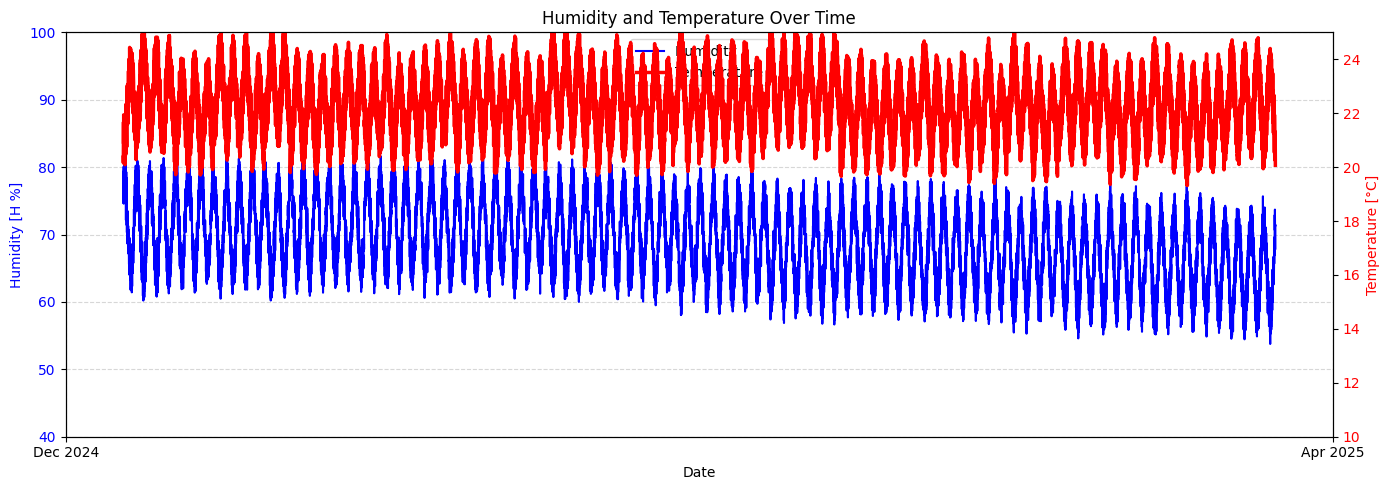

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# 1) Make sure timestamps are real datetimes
# If they are strings like "2025-07-01 00:00:00":
data = data.copy()
data['timestamp'] = pd.to_datetime(data['timestamp'])
# If they were unix seconds use: pd.to_datetime(data['timestamp'], unit='s')

# 2) sort by time (important if not already sorted)
data = data.sort_values('timestamp')

# 3) OPTIONAL: downsample to speed up plotting (every 10th row here)
data_small = data.iloc[::10].copy()

# OR: resample to daily means (uncomment if you prefer)
# data.set_index('timestamp', inplace=True)
# data_small = data.resample('D').mean().dropna().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot humidity on left y-axis
ax1.plot(data_small['timestamp'], data_small['humidity'], label="Humidity", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Humidity [H %]", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_ylim(40, 100)

# Format x-axis: one tick every 3 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=30))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.tick_params(axis='x', rotation=0)

# Plot temperature on right y-axis
ax2 = ax1.twinx()
ax2.plot(data_small['timestamp'], data_small['temperature'], label="Temperature", color="red", linewidth=2.5)
ax2.set_ylabel("Temperature [°C]", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(10, 25)

ax1.set_title("Humidity and Temperature Over Time")
ax1.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper center")

fig.tight_layout()
plt.show()


Temperature and Humidity - View full day

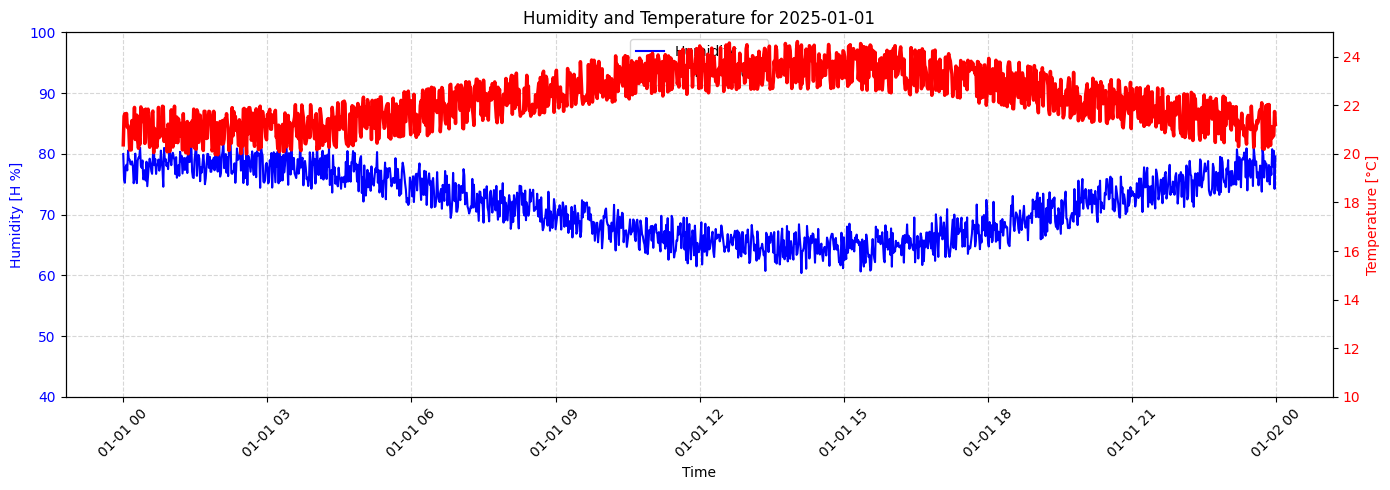

In [14]:
from matplotlib import pyplot as plt


data['timestamp'] = pd.to_datetime(data['timestamp'])

# Select the first day in the dataset
first_day = data['timestamp'].dt.date.min()
one_day_data = data[data['timestamp'].dt.date == first_day]

# Plot humidity and temperature for the first day using dual y-axes style

fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot humidity on left y-axis
ax1.plot(one_day_data['timestamp'], one_day_data['humidity'], label="Humidity", color="blue")
ax1.set_xlabel("Time")
ax1.set_ylabel("Humidity [H %]", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_ylim(40, 100)
ax1.xaxis.set_tick_params(rotation=45)

# Plot temperature on right y-axis
ax2 = ax1.twinx()
ax2.plot(one_day_data['timestamp'], one_day_data['temperature'], label="Temperature", color="red", linewidth=2.5)
ax2.set_ylabel("Temperature [°C]", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(10, 25)

# Title
ax1.set_title(f"Humidity and Temperature for {first_day}")

# Add grid
ax1.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper center")

fig.tight_layout()
plt.show()

View few hours

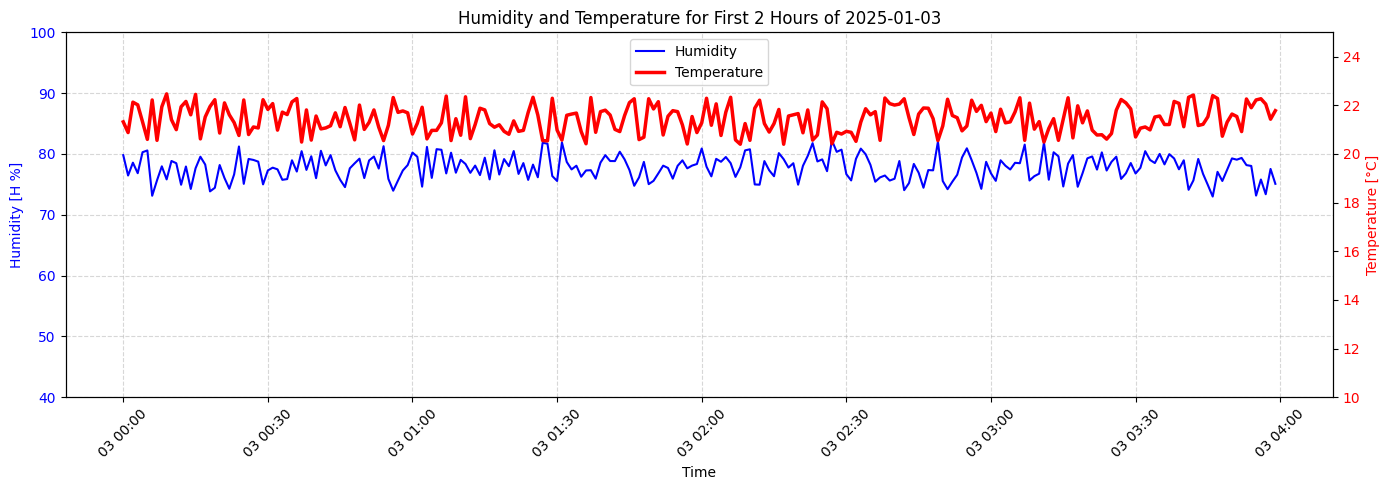

In [15]:
# Filter data for the selected day in the dataset
selected_day = sorted(data['timestamp'].dt.date.unique())[2]
day_data = data[data['timestamp'].dt.date == selected_day]

# Select only the first 6 hours (00:00 to 05:59) of the selected day
hours_data = day_data[day_data['timestamp'].dt.hour < 4]

# Plot humidity and temperature for the first interval hours of the selected day

fig, ax1 = plt.subplots(figsize=(14, 5))

# Plot humidity on left y-axis
ax1.plot(hours_data['timestamp'], hours_data['humidity'], label="Humidity", color="blue")
ax1.set_xlabel("Time")
ax1.set_ylabel("Humidity [H %]", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_ylim(40, 100)
ax1.xaxis.set_tick_params(rotation=45)

# Plot temperature on right y-axis
ax2 = ax1.twinx()
ax2.plot(hours_data['timestamp'], hours_data['temperature'], label="Temperature", color="red", linewidth=2.5)
ax2.set_ylabel("Temperature [°C]", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(10, 25)

# Title
ax1.set_title(f"Humidity and Temperature for First 2 Hours of {selected_day}")

# Add grid
ax1.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper center")

fig.tight_layout()
plt.show()

Fridge Power - View full period

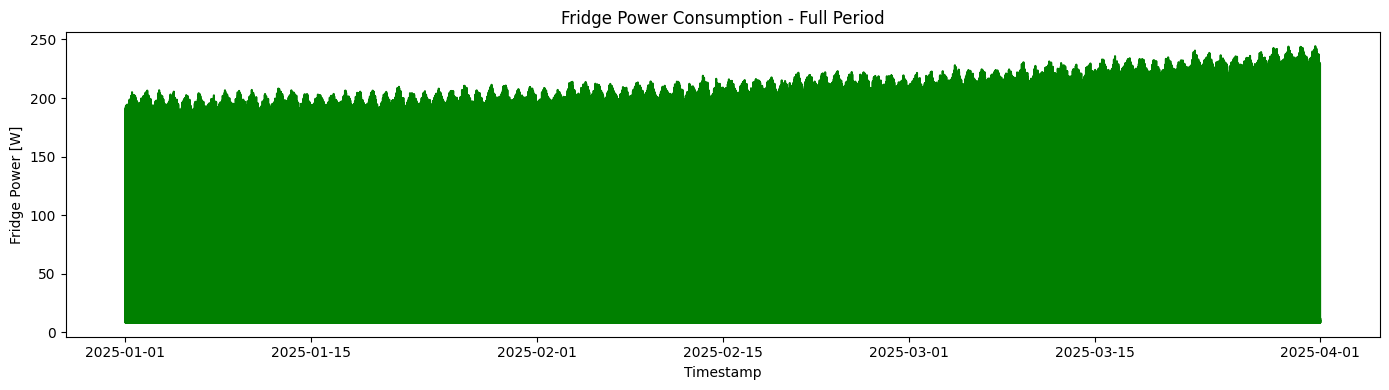

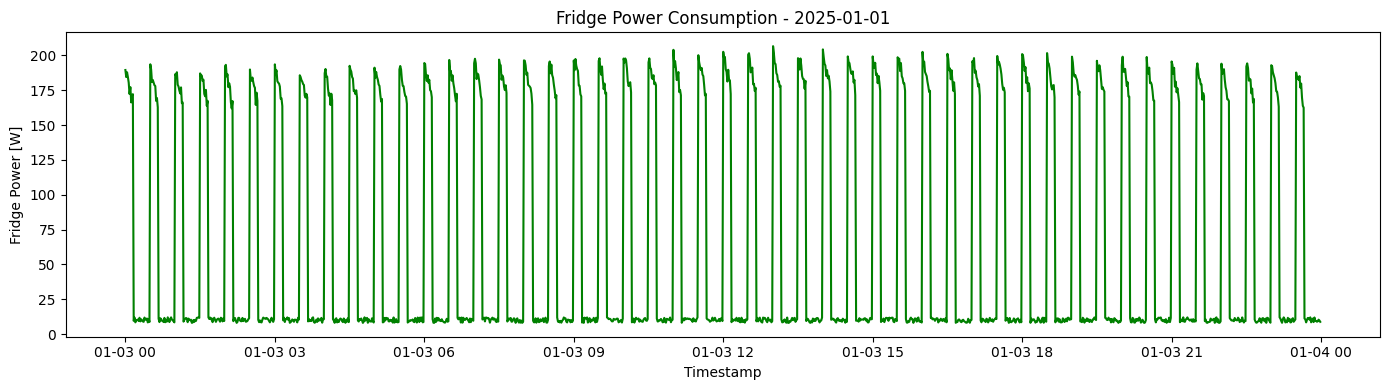

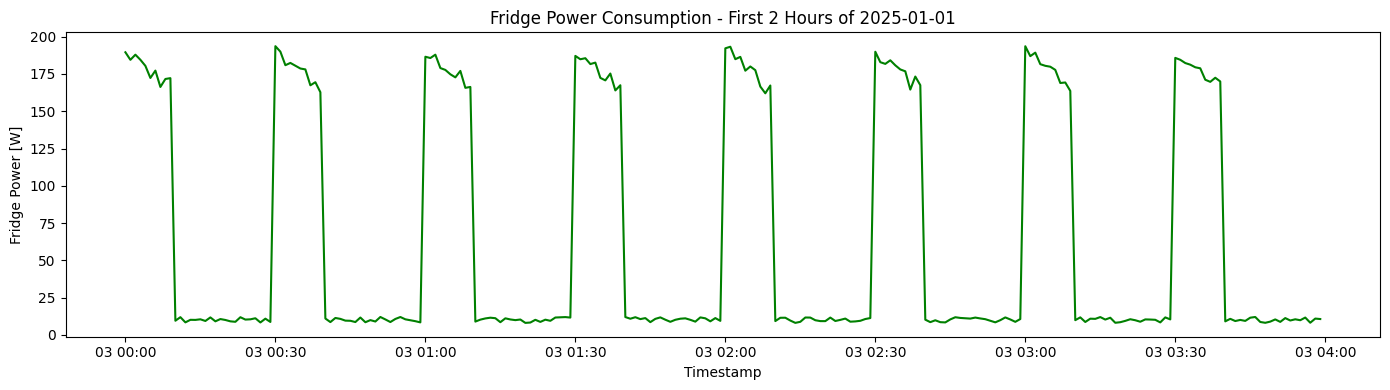

In [16]:
# Select periods for plotting
whole_period = data
one_day_period = day_data
two_hours_period = hours_data

# Plot fridge power consumption for the whole period
plt.figure(figsize=(14, 4))
plt.plot(whole_period['timestamp'], whole_period['fridge_power'], color='green')
plt.title("Fridge Power Consumption - Full Period")
plt.xlabel("Timestamp")
plt.ylabel("Fridge Power [W]")
plt.tight_layout()
plt.show()

# Plot fridge power consumption for one day
plt.figure(figsize=(14, 4))
plt.plot(one_day_period['timestamp'], one_day_period['fridge_power'], color='green')
plt.title(f"Fridge Power Consumption - {first_day}")
plt.xlabel("Timestamp")
plt.ylabel("Fridge Power [W]")
plt.tight_layout()
plt.show()

# Plot fridge power consumption for the first two hours of the day
plt.figure(figsize=(14, 4))
plt.plot(two_hours_period['timestamp'], two_hours_period['fridge_power'], color='green')
plt.title(f"Fridge Power Consumption - First 2 Hours of {first_day}")
plt.xlabel("Timestamp")
plt.ylabel("Fridge Power [W]")
plt.tight_layout()
plt.show()

Motion, Door and Window Sensor - One Day

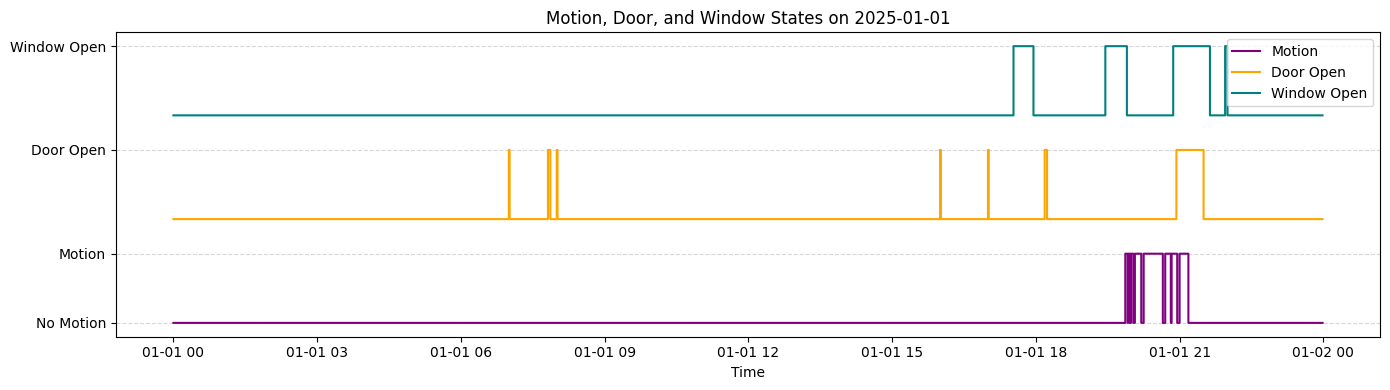

In [17]:
import matplotlib.pyplot as plt

# Plot motion, door_state, and window_state for a single day for clarity
plot_df = one_day_data.copy()

fig, ax = plt.subplots(figsize=(14, 4))

# Plot motion as a step plot
ax.step(plot_df['timestamp'], plot_df['sensor_motion'], where='post', label='Motion', color='purple')

# Plot door_state and window_state as binary indicators (already 0/1)
ax.step(plot_df['timestamp'], plot_df['sensor_door'] + 1.5, where='post', label='Door Open', color='orange')
ax.step(plot_df['timestamp'], plot_df['sensor_window'] + 3, where='post', label='Window Open', color='teal')

ax.set_yticks([0, 1, 2.5, 4])
ax.set_yticklabels(['No Motion', 'Motion', 'Door Open', 'Window Open'])
ax.set_xlabel('Time')
ax.set_title(f"Motion, Door, and Window States on {first_day}")
ax.legend(loc='upper right')
ax.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Histogram

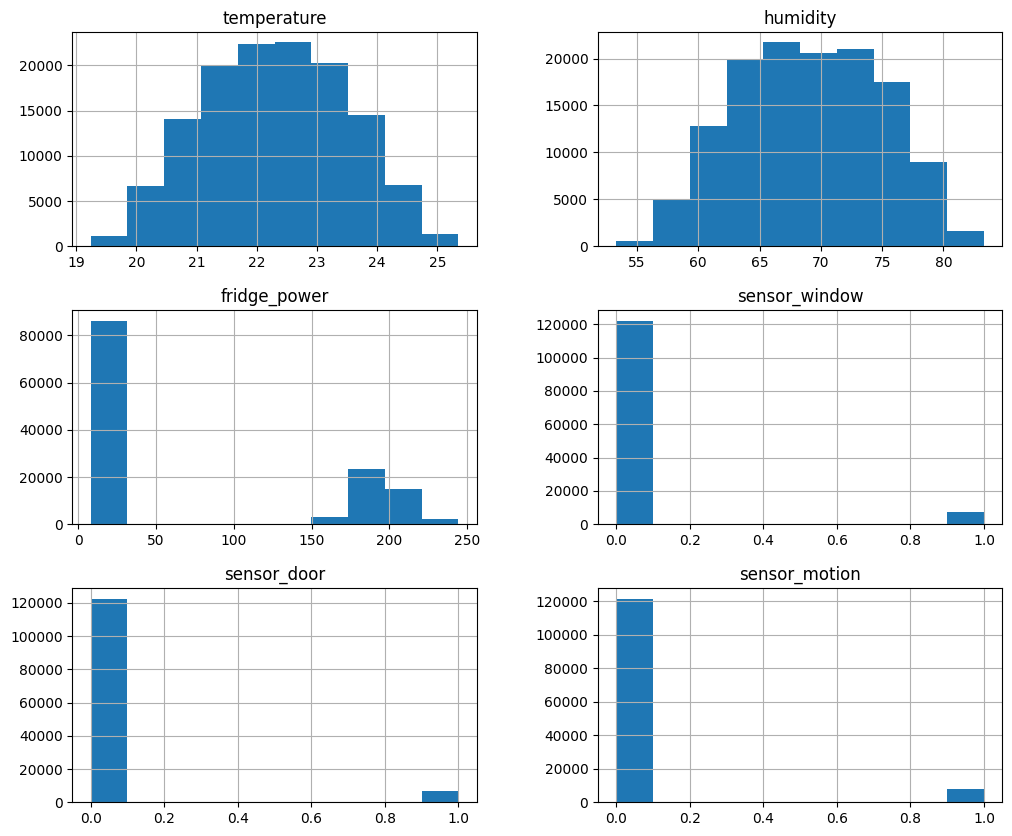

In [25]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns except timestamp
numeric_cols = [col for col in data.columns if col != "timestamp"]
data[numeric_cols].hist(figsize=(12, 10))
plt.show()
